
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
medical_df = pd.read_csv('medical-charges.csv')

In [3]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Можливі гіпотези:
1. Молоді люди будуть платити менше бо здоровіші.
2. Жінки здоровіші за чоловіків, тому будуть платити менше.
3. Курці платять більше, аніж некурці.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

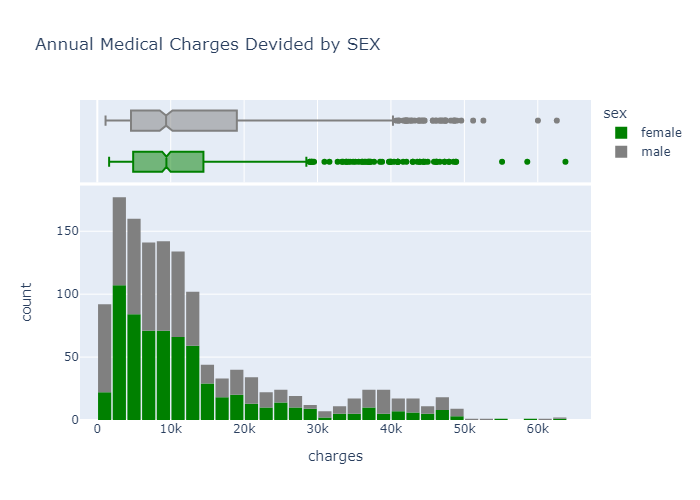

In [4]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges Devided by SEX')
fig.update_layout(bargap=0.1)
fig.show("png")

**Спостереження**: По бокс плоту бачимо, що чоловіки платать бульшу суму по страховці, так як 3 квартиль для чоловіків знаходиться в районі 19 тисяч долларів, в той час як у жінок 75 відсотків усіх значень мають виплати за страховку не більше 14.5 тисяч долларів. 

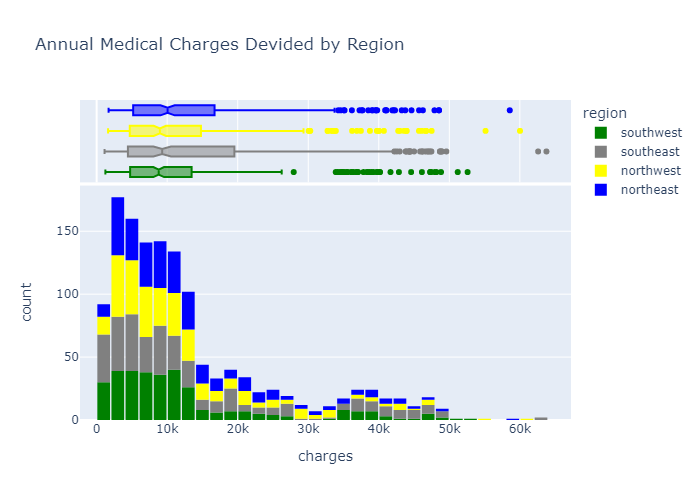

In [5]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'grey', 'yellow', 'blue'],
                   title='Annual Medical Charges Devided by Region')
fig.update_layout(bargap=0.1)
fig.show("png")

**Спостереження**: Тут бачимо, що найбільше виплати по страховці виплачуються в регіонах northwest і southeast, в той час як найменші виплати йдуть з southwest.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

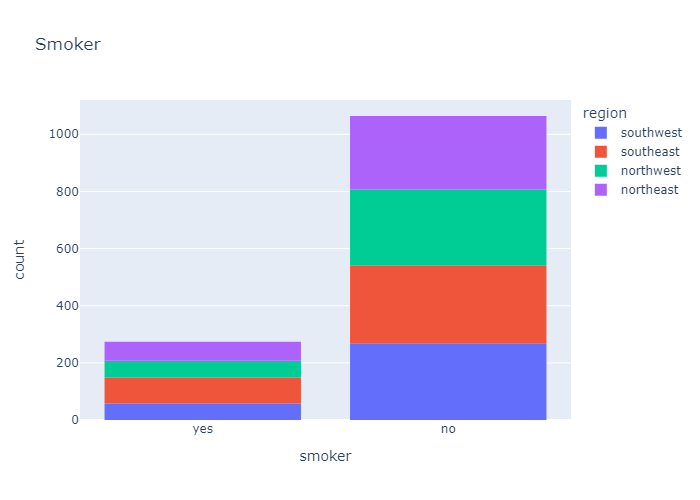

In [6]:
fig = px.histogram(medical_df, x='smoker', color='region', title='Smoker')
fig.show("png")

**Спостереження**: Найбільше курців знаходиться в southeast регіоні, а найменш курящі регіони це - northwest і southwest.

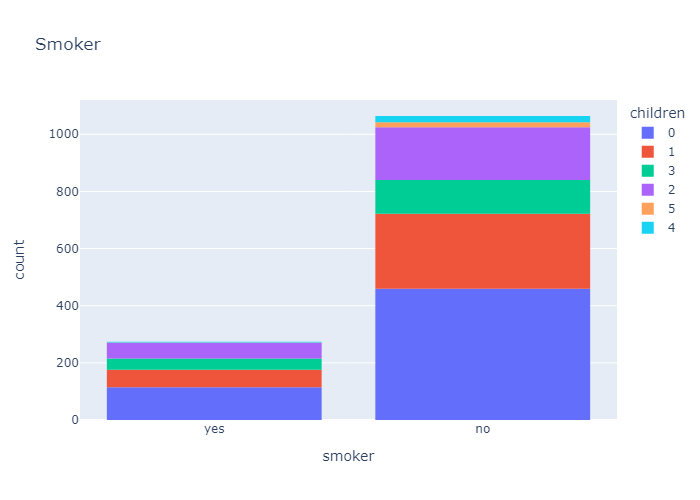

In [7]:
fig = px.histogram(medical_df, x='smoker', color='children', title='Smoker')
fig.show("png")

**Спостереження**: Тут бачимо, що люди, які не мають дітей частіше палять, аніж люди з дітьми, особливо якщо двоє і більше дітей у родині.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

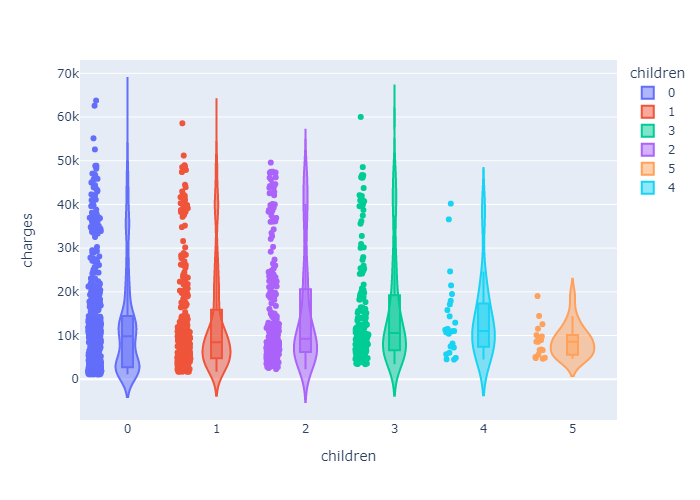

In [8]:
fig = px.violin(medical_df, x='children', y='charges', color='children', box=True, points='all')
fig.show("png")

**Спостереження**:
- Найбільша група серед платників за медичну страховку є люди без дітей. 
- В середньому найбільше за медичну страховку платять групи, де є 4 дитини та 3 дитини, 11 тисяч і 10.6 тисяч долларів відповідно. А найменше - в групі людей де є одна дитина - 8.4 тисячі долларів.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [9]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [10]:
def estimate_charges(age, w, b):
    return w * age + b

In [11]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

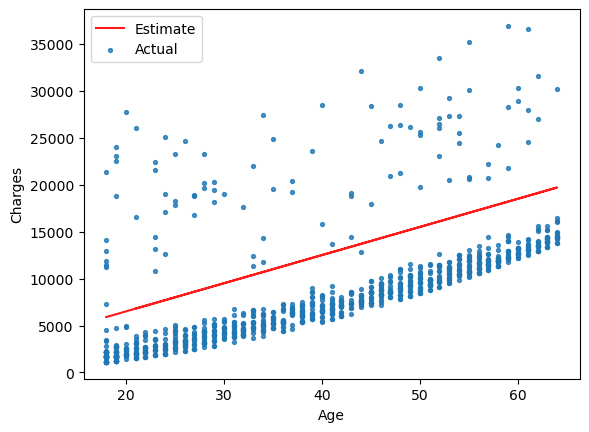

In [12]:
try_parameters(non_smoker_df, 300, 500)

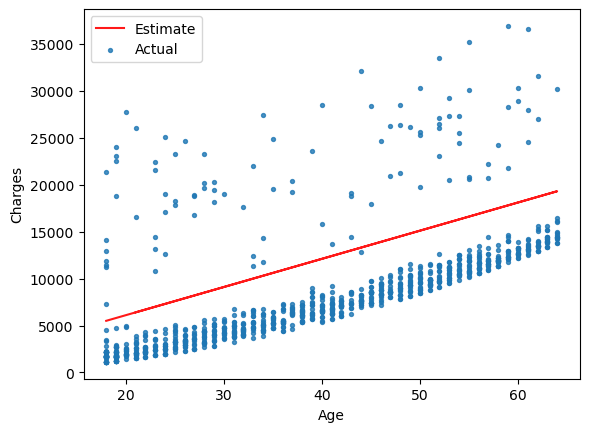

In [13]:
try_parameters(non_smoker_df, 300, 100)

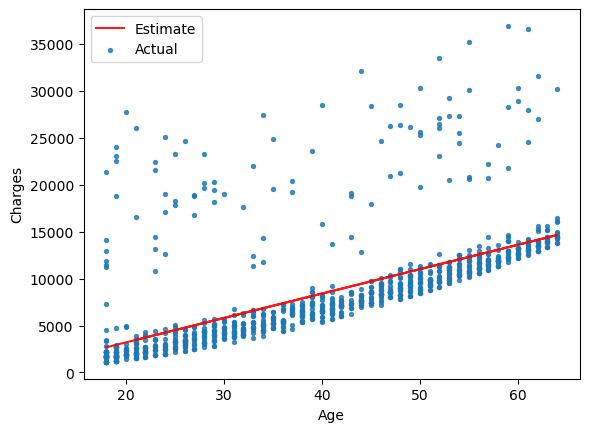

In [14]:
try_parameters(non_smoker_df, 260, -2000)

**Спостереження**
- Кут нахилу який описується за допомогою параметру w має бути десь між 200 та 300, видно, що мені не вистачає трохи припідняти пряму ліворуч, щоб вона ідеально лягла поміж основних спостережень.
- По b параметру виглядає, що потрібно ще трошки нижче опустити пряму, щоб було ідеальне співідношення.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [15]:
def rmse(df, target, col, w, b):
    targets = df['charges']
    predicted = estimate_charges(df[col], w, b)
    rmse = np.sqrt(np.mean(np.square(targets - predicted)))
    print(f'w = {w}, b = {b}, rmse = {rmse}')
    return rmse

In [16]:
rmse(non_smoker_df, 'charges', 'age', 300, 500)

w = 300, b = 500, rmse = 6084.09864419118


6084.09864419118

In [17]:
rmse(non_smoker_df, 'charges', 'age', 300, 100)

w = 300, b = 100, rmse = 5837.053173265297


5837.053173265297

In [18]:
rmse(non_smoker_df, 'charges', 'age', 260, -2000)

w = 260, b = -2000, rmse = 4667.658904656395


4667.658904656395

**Висновок:**
Найкращий показник втрат вийшов $4668. Це були параметри w = 260, b = -2000.
Стратегія по перебору може бути наступна:
1. Мінімізуємо значення функції втрат допоки воно не перестане змінюватись на кращу сторону, тобто допоки воно буде спадати.
2. І також треба щось подумати з приводу аутлаєрів, бо вони явно викажають картину. Можна спробувати їх відкинути, але перед тим перевірити що їх відсоток менше 1-3%.